<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.947958,46.576617,25.064118,-50.773346,108.815347,179.425076,-70.609729
1,0.0,1.0,80.313958,36.974386,79.155045,228.100229,434.543618,566.042658,-131.499040
2,0.0,2.0,57.323058,97.494246,22.514954,-2183.780085,-1996.447827,108.147907,-2104.595734
3,0.0,3.0,84.582638,92.886609,62.446303,2014.420273,2264.335823,614.043996,1650.291827
4,0.0,4.0,89.657484,62.713492,48.200699,-107.693608,102.878066,482.716934,-379.838868
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,93.687228,99.127126,76.324498,-50.645851,228.493000,171.241042,57.251959
59996,999.0,56.0,89.880101,84.531556,61.790029,-914.428073,-668.226387,216.605622,-884.832009
59997,999.0,57.0,53.894633,61.047785,82.879081,294.434028,502.255526,191.182673,311.072853
59998,999.0,58.0,51.721584,62.145284,21.414583,-1573.542551,-1428.261100,-11.156697,-1417.104403


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.947958,46.576617,25.064118,-50.773346,108.815347,179.425076,-70.609729
1,0.0,1.0,80.313958,36.974386,79.155045,228.100229,434.543618,566.042658,-131.499040
2,0.0,2.0,57.323058,97.494246,22.514954,-2183.780085,-1996.447827,108.147907,-2104.595734
3,0.0,3.0,84.582638,92.886609,62.446303,2014.420273,2264.335823,614.043996,1650.291827
4,0.0,4.0,89.657484,62.713492,48.200699,-107.693608,102.878066,482.716934,-379.838868
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,93.687228,99.127126,76.324498,-50.645851,228.493000,171.241042,57.251959
59996,999.0,56.0,89.880101,84.531556,61.790029,-914.428073,-668.226387,216.605622,-884.832009
59997,999.0,57.0,53.894633,61.047785,82.879081,294.434028,502.255526,191.182673,311.072853
59998,999.0,58.0,51.721584,62.145284,21.414583,-1573.542551,-1428.261100,-11.156697,-1417.104403


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    77.947958  46.576617  ...  179.425076   -70.609729
      1.0    80.313958  36.974386  ...  566.042658  -131.499040
      2.0    57.323058  97.494246  ...  108.147907 -2104.595734
      3.0    84.582638  92.886609  ...  614.043996  1650.291827
      4.0    89.657484  62.713492  ...  482.716934  -379.838868
...                ...        ...  ...         ...          ...
999.0 55.0   93.687228  99.127126  ...  171.241042    57.251959
      56.0   89.880101  84.531556  ...  216.605622  -884.832009
      57.0   53.894633  61.047785  ...  191.182673   311.072853
      58.0   51.721584  62.145284  ...  -11.156697 -1417.104403
      59.0   51.519009  46.418887  ...  334.273827   702.263463

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    77.947958  46.576617  ...  179.425076   -70.609729
      1.0    80.313958  36.974386  ...  566.042658  -131.499040
      2.0    57.323058  97.494246  ...  108.147907 -2104.595734
      3.0    84.582638  92.886609  ...  614.043996  1650.291827
      4.0    89.657484  62.713492  ...  482.716934  -379.838868
...                ...        ...  ...         ...          ...
999.0 55.0   93.687228  99.127126  ...  171.241042    57.251959
      56.0   89.880101  84.531556  ...  216.605622  -884.832009
      57.0   53.894633  61.047785  ...  191.182673   311.072853
      58.0   51.721584  62.145284  ...  -11.156697 -1417.104403
      59.0   51.519009  46.418887  ...  334.273827   702.263463

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.947958,46.576617,25.064118,-50.773346,108.815347,179.425076,-70.609729
1,0.0,1.0,80.313958,36.974386,79.155045,228.100229,434.543618,566.042658,-131.499040
2,0.0,2.0,57.323058,97.494246,22.514954,-2183.780085,-1996.447827,108.147907,-2104.595734
3,0.0,3.0,84.582638,92.886609,62.446303,2014.420273,2264.335823,614.043996,1650.291827
4,0.0,4.0,89.657484,62.713492,48.200699,-107.693608,102.878066,482.716934,-379.838868
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,93.687228,99.127126,76.324498,-50.645851,228.493000,171.241042,57.251959
59996,999.0,56.0,89.880101,84.531556,61.790029,-914.428073,-668.226387,216.605622,-884.832009
59997,999.0,57.0,53.894633,61.047785,82.879081,294.434028,502.255526,191.182673,311.072853
59998,999.0,58.0,51.721584,62.145284,21.414583,-1573.542551,-1428.261100,-11.156697,-1417.104403


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    77.947958  46.576617  ...  179.425076   -70.609729
      1.0    80.313958  36.974386  ...  566.042658  -131.499040
      2.0    57.323058  97.494246  ...  108.147907 -2104.595734
      3.0    84.582638  92.886609  ...  614.043996  1650.291827
      4.0    89.657484  62.713492  ...  482.716934  -379.838868
...                ...        ...  ...         ...          ...
999.0 55.0   93.687228  99.127126  ...  171.241042    57.251959
      56.0   89.880101  84.531556  ...  216.605622  -884.832009
      57.0   53.894633  61.047785  ...  191.182673   311.072853
      58.0   51.721584  62.145284  ...  -11.156697 -1417.104403
      59.0   51.519009  46.418887  ...  334.273827   702.263463

[60000 rows x 7 columns]

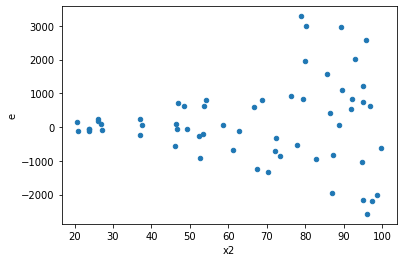

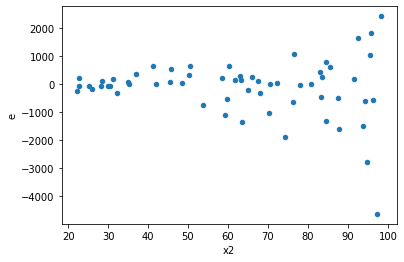

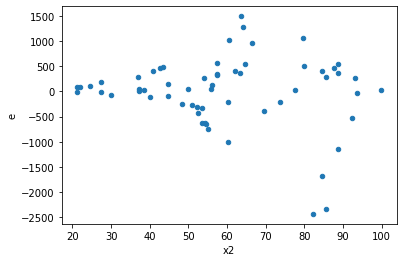

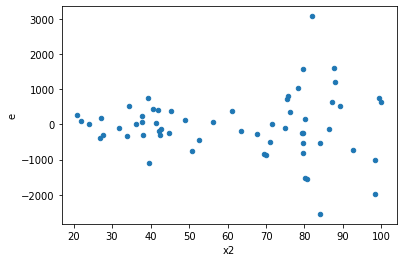

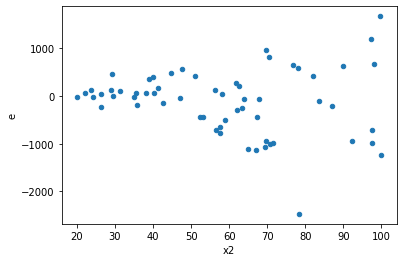

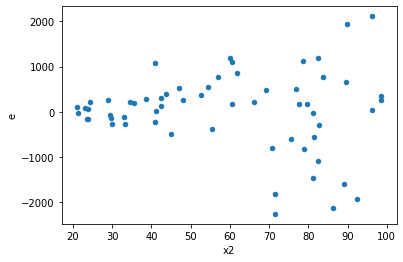

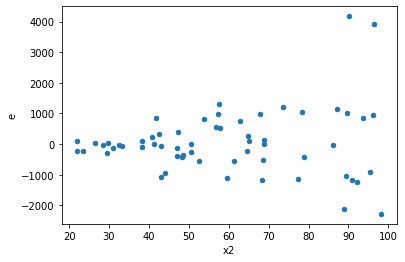

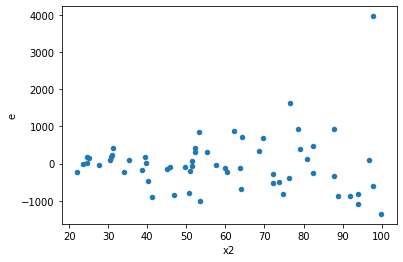

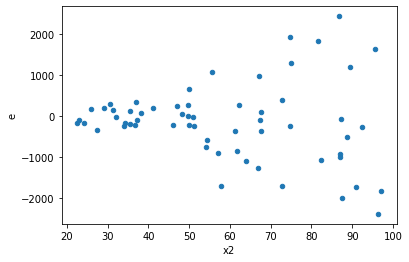

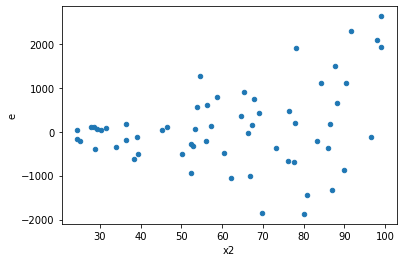

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,3098000.733743082,53901796.252659865,147523.84446395628,2566752.2025076128,17.398897187327123,1.167755403486126e-08,0.999999994161223,5.83877701743063e-09,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,3304553.7620870876,50754767.48526085,157359.702956528,2416893.689774326,15.359038205874183,3.7701944899382056e-08,0.9999999811490276,1.8850972449691028e-08,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,1383027.2788584868,17875555.48146715,65858.44185040414,851216.9276889119,12.924947869590213,1.8549495361952495e-07,0.9999999072525232,9.274747680976247e-08,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,3172889.174783457,36170442.91310369,151089.96070397415,1722402.0434811283,11.399844406974047,5.777307401366727e-07,0.9999997111346299,2.8886537006833635e-07,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,1164171.9268811091,20271929.094542664,55436.75842290996,965329.956882984,17.413174657846678,1.1587268700097297e-08,0.9999999942063656,5.793634350048649e-09,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,2138634.473478607,29010585.801041506,101839.73683231461,1381456.4667162623,13.565004286989815,1.1913616271286287e-07,0.9999999404319186,5.9568081356431435e-08,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,3312578.8107484914,48565957.37689251,157741.84813088053,2312664.636994881,14.661072279792437,5.81242987074404e-08,0.9999999709378506,2.90621493537202e-08,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,1990780.7329876286,27727473.355989873,94799.08252322041,1320355.8740947559,13.927939374005476,9.342823248381649e-08,0.9999999532858838,4.6714116241908243e-08,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,787808.4397157828,41768804.869271494,37514.68760551346,1988990.7080605472,53.018986296136156,1.9739765377835283e-13,0.9999999999999013,9.869882688917642e-14,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,3098000.733743082,53901796.252659865,147523.84446395628,2566752.2025076128,17.398897187327123,1.167755403486126e-08,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,3304553.7620870876,50754767.48526085,157359.702956528,2416893.689774326,15.359038205874183,3.7701944899382056e-08,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,1383027.2788584868,17875555.48146715,65858.44185040414,851216.9276889119,12.924947869590213,1.8549495361952495e-07,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,3172889.174783457,36170442.91310369,151089.96070397415,1722402.0434811283,11.399844406974047,5.777307401366727e-07,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,1164171.9268811091,20271929.094542664,55436.75842290996,965329.956882984,17.413174657846678,1.1587268700097297e-08,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,2138634.473478607,29010585.801041506,101839.73683231461,1381456.4667162623,13.565004286989815,1.1913616271286287e-07,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,3312578.8107484914,48565957.37689251,157741.84813088053,2312664.636994881,14.661072279792437,5.81242987074404e-08,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,1990780.7329876286,27727473.355989873,94799.08252322041,1320355.8740947559,13.927939374005476,9.342823248381649e-08,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,787808.4397157828,41768804.869271494,37514.68760551346,1988990.7080605472,53.018986296136156,1.9739765377835283e-13,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    989
Reject001=1 : Homoscedasticity       11
Name: Result_test, dtype: int64